### Project 2020
###### Machine Learning and Statistics
###### Submission Date: January 8th, 2021

#### Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

(0.0, 130.0)

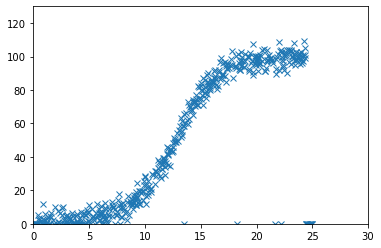

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
from tensorflow import keras as kr
from tensorflow.keras import layers
input_file = "powerproduction.csv"

# comma delimited is the default
df = pd.read_csv(input_file, header = 0)

original_headers = list(df.columns.values)

df = df._get_numeric_data()

numeric_headers = list(df.columns.values)


numpy_array = df.to_numpy()
X = numpy_array
# Plot the data set.
plt.plot(X[:,0], X[:,1], 'x')
# Set reasonable limits.
plt.xlim([0,30])
plt.ylim([0,130])

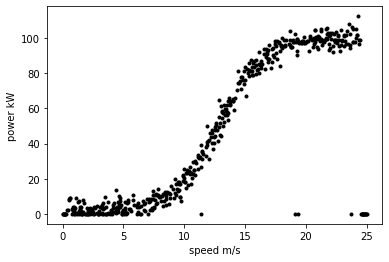

In [2]:
a, m, n, t = 100.0, 20.0, 1200.0, 1.8

x = np.linspace(0.0, 25.0, 1000)

x = x[np.sort(np.random.choice(len(x), size=len(x) // 2, replace=False))]

e = np.random.normal(0.0, 4.0, len(x))

y = a * ((1.0 + m * np.exp(-x / t)) / (1.0 + n * np.exp(-x / t)))
y = y + e

y[y < 0] = 0.0
y[x <= 0.3] = 0.0

y[x >= 24.4] = 0.0

y[np.sort(np.random.choice(len(y), size=len(y) // 100, replace=False))] = 0.0

fig = plt.figure()
plt.plot(x, y, 'k.')
plt.xlabel(r"speed m/s")
plt.ylabel(r"power kW")

df = pd.DataFrame({"speed": x, "power": y})
df.to_csv("powerproduction.csv", index=False, float_format='%.3f')

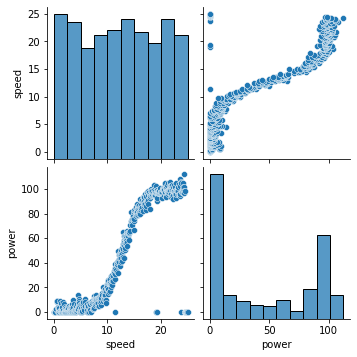

In [3]:
import seaborn as sns
sns.pairplot(df)

In [69]:
def f(x, p):
    return p[0] + x * p[1]

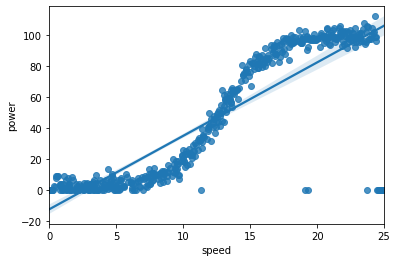

In [70]:
windspeed = df[["speed", "power"]].dropna()
sns.regplot(x="speed", y="power", data=df)

In [71]:
import sklearn.linear_model as lin

x = windspeed["power"].to_numpy()
y = windspeed["speed"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
i = model.intercept_
c = model.coef_
r= model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [72]:
i

5.486771232669268

In [73]:
c

array([0.14885215])

In [74]:
r

0.7079082555394639

In [67]:
p

[5.486771232669268, 0.14885214920560313]

In [75]:
f(70.0, p)

15.906421677061488

In [76]:
def predict(x):
    return f(x,p)

In [77]:
predict(70.0)

15.906421677061488

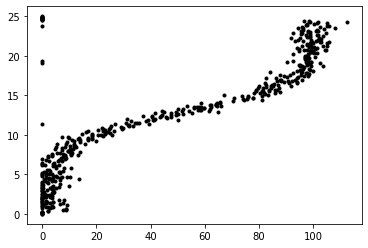

In [78]:
plt.plot(x, y, 'k.')

In [79]:
f = lambda x: 3.0 * x + 1.0

In [80]:
from sklearn.model_selection import train_test_split
X_train20, X_test20 = train_test_split(x, test_size=0.20)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting the 80% Training to the scaler.
scaler.fit(X_train20)

X_train = scaler.transform(X_train20)
X_test = scaler.transform(X_test20)
Y_train = f(X_train)
Y_test = f(X_test)

In [82]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [83]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 0s 1ms/step - loss: 4.9531
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 4.5286
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 4.9704
Epoch 4/500
13/13 [==============================] - 0s 917us/step - loss: 4.8220
Epoch 5/500
13/13 [==============================] - 0s 917us/step - loss: 4.7671
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 4.6658
Epoch 7/500
13/13 [==============================] - 0s 917us/step - loss: 4.4048
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 4.6561
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 4.3068
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 4.2409
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 4.0916
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 4.1882
Epoch 13/500
13/13 [===========

13/13 [==============================] - 0s 1ms/step - loss: 0.8856
Epoch 102/500
13/13 [==============================] - 0s 916us/step - loss: 0.8454
Epoch 103/500
13/13 [==============================] - 0s 1ms/step - loss: 0.8362
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 0.8170
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 0.8428
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 0.8032
Epoch 107/500
13/13 [==============================] - 0s 1000us/step - loss: 0.7723
Epoch 108/500
13/13 [==============================] - 0s 1000us/step - loss: 0.7461
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 0.7416
Epoch 110/500
13/13 [==============================] - 0s 1ms/step - loss: 0.7239
Epoch 111/500
13/13 [==============================] - 0s 917us/step - loss: 0.6695
Epoch 112/500
13/13 [==============================] - 0s 1000us/step - loss: 0.6653
Epoch 113/500
13/

13/13 [==============================] - 0s 1000us/step - loss: 0.0668
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0620
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 203/500
13/13 [==============================] - 0s 1000us/step - loss: 0.0582
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0561
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 207/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514
Epoch 208/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0494
Epoch 209/500
13/13 [==============================] - 0s 1000us/step - loss: 0.0479
Epoch 210/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 211/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 212/500
13/13 [

13/13 [==============================] - 0s 1000us/step - loss: 6.2011e-04
Epoch 299/500
13/13 [==============================] - 0s 1000us/step - loss: 5.9417e-04
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 5.3628e-04
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 5.1031e-04
Epoch 302/500
13/13 [==============================] - 0s 917us/step - loss: 4.6413e-04
Epoch 303/500
13/13 [==============================] - 0s 1ms/step - loss: 4.4608e-04
Epoch 304/500
13/13 [==============================] - 0s 1ms/step - loss: 4.1694e-04
Epoch 305/500
13/13 [==============================] - 0s 1ms/step - loss: 3.8069e-04
Epoch 306/500
13/13 [==============================] - 0s 1ms/step - loss: 3.6462e-04
Epoch 307/500
13/13 [==============================] - 0s 999us/step - loss: 3.3436e-04
Epoch 308/500
13/13 [==============================] - 0s 1ms/step - loss: 3.1301e-04
Epoch 309/500
13/13 [==============================] - 0s 

13/13 [==============================] - 0s 1ms/step - loss: 1.1349e-07
Epoch 393/500
13/13 [==============================] - 0s 1000us/step - loss: 1.0240e-07
Epoch 394/500
13/13 [==============================] - 0s 1000us/step - loss: 9.1956e-08
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 8.0666e-08
Epoch 396/500
13/13 [==============================] - 0s 1ms/step - loss: 7.1287e-08
Epoch 397/500
13/13 [==============================] - 0s 1000us/step - loss: 6.2438e-08
Epoch 398/500
13/13 [==============================] - 0s 1000us/step - loss: 5.6838e-08
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 4.9904e-08
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 4.1412e-08
Epoch 401/500
13/13 [==============================] - 0s 998us/step - loss: 3.7748e-08
Epoch 402/500
13/13 [==============================] - 0s 1ms/step - loss: 3.3070e-08
Epoch 403/500
13/13 [==============================] -

13/13 [==============================] - 0s 916us/step - loss: 1.8897e-10
Epoch 487/500
13/13 [==============================] - 0s 1ms/step - loss: 1.9054e-10
Epoch 488/500
13/13 [==============================] - 0s 1ms/step - loss: 1.7469e-10
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 1.7350e-10
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 1.7392e-10
Epoch 491/500
13/13 [==============================] - 0s 916us/step - loss: 1.7593e-10
Epoch 492/500
13/13 [==============================] - 0s 1000us/step - loss: 1.7083e-10
Epoch 493/500
13/13 [==============================] - 0s 1000us/step - loss: 1.7126e-10
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 1.7033e-10
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 1.7370e-10
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 1.6844e-10
Epoch 497/500
13/13 [==============================] - 0s 

In [84]:
model.predict([5.0,10.0,15.0,20.0])

array([[15.999937],
       [30.999874],
       [45.99981 ],
       [60.99975 ]], dtype=float32)

In [85]:
np.array([[f(i)] for i in [5.0, 10.0, 15.0, 20.0]])

array([[16.],
       [31.],
       [46.],
       [61.]])

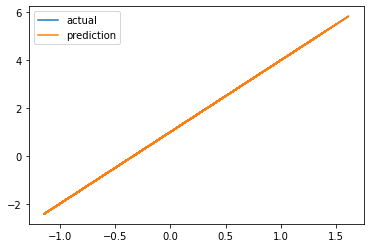

In [86]:
plt.plot(X_test, Y_test, label='actual')
plt.plot(X_test, model.predict(X_test), label='prediction')
plt.legend();

In [58]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.5669


1.5668574571609497

### References

[1] GMIT, “Quality assurance framework,”
https://www.gmit.ie/general/quality-assurance-framework.

[2] I. McLoughlin, “Using git for assessments,”
https://github.com/ianmcloughlin/using-git-for-assessments/.

[3]
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.sciencedirect.com/science/article/abs/pii/S0196890419308052

https://keras.io/examples/vision/mnist_convnet/

https://github.com/ianmcloughlin/project-2020/blob/main/train-model.ipynb